In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-06-23 10:52:39.480225: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 10:52:39.480410: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-23 10:52:39.609534: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
df = pd.read_csv('/kaggle/input/ai-1803-dpl-302-m-butterfly-image-classification/Training_set.csv')

df.head()

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [4]:
df['label'].nunique()

75

In [5]:
X = []
y = df['label'].values

y.shape

(5000,)

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [8]:
dir = '/kaggle/input/ai-1803-dpl-302-m-butterfly-image-classification/train/train'

for x in df['filename']:
    X.append(cv2.imread(os.path.join(dir, x)))

X = np.array(X)

X.shape

(5000, 224, 224, 3)

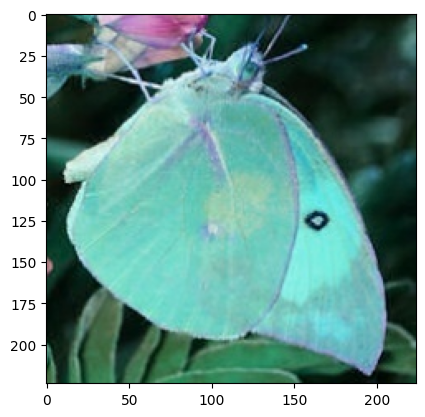

In [9]:
im = X[0]

plt.imshow(im)

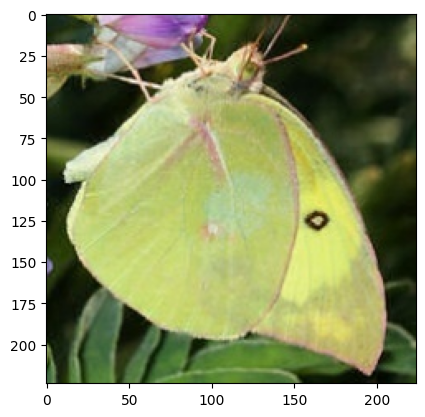

In [10]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

plt.imshow(im)

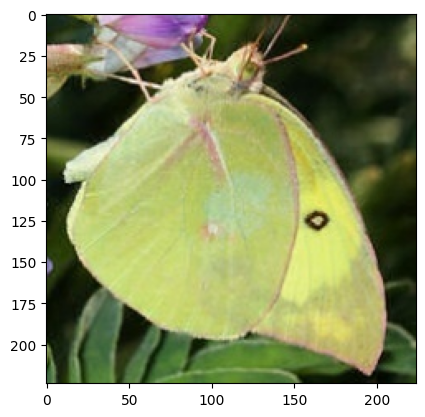

In [11]:
for i in range(X.shape[0]):
    X[i] = cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB)
    
plt.imshow(X[0])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((4000, 224, 224, 3), (1000, 224, 224, 3), (4000,), (1000,))

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Regularizer
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom, RandomContrast
from tensorflow.keras import regularizers

In [15]:
model = Sequential()

model.add(Rescaling(1 / 255, input_shape = (224, 224, 3)))

model.add(RandomFlip())
model.add(RandomRotation((-1, 1)))
model.add(RandomZoom(height_factor = 0.2, width_factor = 0.2))
model.add(RandomContrast(0.5))

model.add(Conv2D(16, (5, 5), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (5, 5), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l1_l2()))
model.add(Dense(128, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l1_l2()))
model.add(Dense(128, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l1_l2()))

model.add(Dropout(0.2))

model.add(Dense(75, activation = 'softmax'))

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast                 │ (None, 224, 224, 3)    │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 220, 220, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 106, 106, 32)   │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 51, 51, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 23, 23, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,667,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 75)             │         9,675 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,816,363 (33.63 MB)

 Trainable params: 8,816,363 (33.63 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer = 'adam', loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [17]:
hst = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data = (X_val, y_val))

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


125/125 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.0179 - loss: 4.3553 - val_accuracy: 0.0110 - val_loss: 4.3189
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.0208 - loss: 4.3144 - val_accuracy: 0.0270 - val_loss: 4.3183
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.0210 - loss: 4.3115 - val_accuracy: 0.0300 - val_loss: 4.2959
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.0268 - loss: 4.2219 - val_accuracy: 0.0540 - val_loss: 3.8843
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.0470 - loss: 3.8842 - val_accuracy: 0.0720 - val_loss: 3.6792
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.0781 - loss: 3.6705 - val_accuracy: 0.1150 - val_loss: 3.4808
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.0955 - loss: 3.4695 - val_accuracy: 0.1250 - val_loss: 3.4453
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.1232 - loss: 3.3341 - val_accuracy

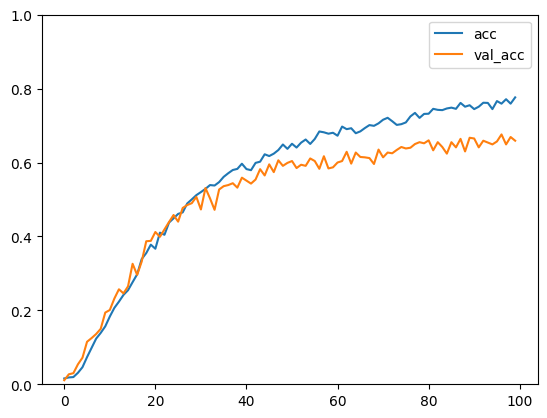

In [18]:
acc = hst.history['accuracy']
val_acc = hst.history['val_accuracy']
n = len(acc)

plt.ylim(0.0, 1.0)

plt.plot(acc, label='acc')
plt.plot(val_acc, label='val_acc')
plt.legend()

In [19]:
model.evaluate(X_train, y_train)

125/125 ━━━━━━━━━━━━━━━━━━━━ 38s 306ms/step - accuracy: 0.8391 - loss: 0.4488


[0.43892133235931396, 0.847000002861023]

In [20]:
model.evaluate(X_val, y_val)

32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 294ms/step - accuracy: 0.6566 - loss: 1.4600


[1.4190459251403809, 0.6589999794960022]

In [21]:
import pandas as pd
# Tạo DataFrame với dữ liệu mẫu
data = {
    'filename': [str('Image_'+ str(i)+'.jpg') for i in range(1,1500)],
    'label': [i for i in range(1,1500)]
}

df = pd.DataFrame(data)
csv_file_path = 'Testing_set.csv'
df.to_csv(csv_file_path, index=False)

df_test = pd.read_csv('Testing_set.csv')

df_test.head()

,filename,label
0,Image_1.jpg,1
1,Image_2.jpg,2
2,Image_3.jpg,3
3,Image_4.jpg,4
4,Image_5.jpg,5


In [22]:
import cv2
import os
X_test = []

dir = '/kaggle/input/ai-1803-dpl-302-m-butterfly-image-classification/test/test'

for x in df['filename']:
    X_test.append(cv2.imread(os.path.join(dir, x)))
    
X_test = np.array(X_test)

X_test.shape

(1499, 224, 224, 3)

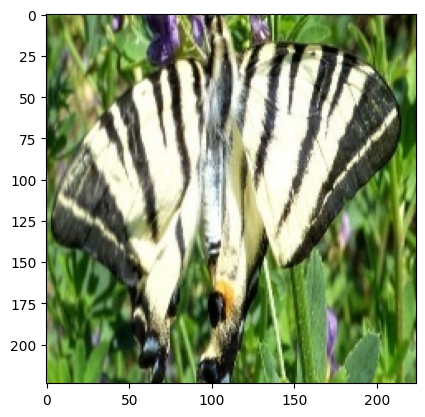

In [23]:
for i in range(X_test.shape[0]):
    X_test[i] = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB)
plt.imshow(X_test[0])

In [24]:
y_pred = model.predict(X_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 302ms/step


In [25]:
predictions = []

In [26]:
for i in y_pred:
    predictions.append(np.argmax(i))

In [27]:
predictions = encoder.inverse_transform(predictions)

predictions

array(['SCARCE SWALLOW', 'STRAITED QUEEN', 'ZEBRA LONG WING', ...,
       'CLODIUS PARNASSIAN', 'ELBOWED PIERROT', 'ATALA'], dtype=object)

In [28]:
# Tạo DataFrame từ 'predictions'
df = pd.DataFrame({'filename': [f'Image_{i}.jpg' for i in range(1, len(predictions) + 1)],
                   'label': predictions})

# Lưu DataFrame vào tệp CSV
csv_file_path = 'Testing_set.csv'
df.to_csv(csv_file_path, index=False, mode='w')